# Introduction

I just want to discuss some basic features of the course. We discuss the core references, the tooling for the course, student projects, and illustrate the basics of the potential outcomes model.

## Core reference

The whole course is build on the following textbook:

* Winship, C., & Morgan, S. L. (2007). [*Counterfactuals and causal inference: Methods and principles for social research (Analytical methods for social research)*](https://www.amazon.com/Counterfactuals-Causal-Inference-Principles-Analytical/dp/1107694167/ref=dp_ob_title_bk). Cambridge, England: Cambridge University Press.

This is a rather non-standard textbook in economics. However, I very much enjoy working with it as it provides a coherent conceptual framework for a host of different methods for causal analysis. It then clearly delineates the special cases that allow the application of particular methods. It is not very technical, so will also need to draw on more conventional resources to fill this gap.

* Wooldridge, J. M. (2001). [*Econometric analysis of cross section and panel data*](https://mitpress.mit.edu/books/econometric-analysis-cross-section-and-panel-data). Cambridge, MA: The MIT Press.

* Angrist, J. D., & Pischke, J. (2009). [*Mostly harmless econometrics: An empiricists companion*](https://www.amazon.com/Mostly-Harmless-Econometrics-Empiricists-Companion/dp/0691120358/ref=sr_1_1?keywords=mostly+harmless+econometrics&qid=1553511192&s=gateway&sr=8-1). Princeton, NJ: Princeton University Press.

One unique feature of our core textbook is the use of the potential outcome model and causal graphs. We will take a first stab at the potential outcome model below but here is a teaser for what to expect from a causal graph.

<img src="material/causal_graph.png" height="500" width=500 />

## Tooling for the course

We will use open-source software and some of the tools building on it extensively throughout the course.

* Course website
* GitHub
* Slack
* Python 
* Scipy
* Jupyter 
* Travis CI

We will briefly discuss each of them, how they work together and allow for better economic research.

## Projects

Applying these methods and understanding their protential and limitations is only possible when bringing them to bear on one's one research project. So we will work on student projects during the course. Details and and an example are provided [here](https://github.com/HumanCapitalAnalysis/student-project-template).

## Potential outcome model


### Basic setup

There are three simple issues:

* $Y_1$, outcome in the treatment state
* $Y_0$, outcome in the no-treatment state
* $D$, treatment state

#### Examples

* economics of education
* health economics
* industrial organization
* $...$

### Exploration

We will use our first dataset to illustrate the basic problems of causal analysis. We will use the original data from the article below:

* LaLonde, Robert J. (1986). Evaluating the Econometric Evaluations of Training Programs with Experimental Data.

He summarizes the basic setup as follows:

> The National Supported Work Demonstration (NSW) was temporary employment program desinged to help disadvantaged workers lacking basic job skills move into the labor market by giving them work experience and counseling in sheltered environment. UNlike other federally sponsored employment programs, the NSW program assinged qualified applications randomly. Those assigned to the treatment group received all the benefits of the NSW program, while those assingned to the control group were left to fend for themselves.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_pickle('../../datasets/processed/angrist_pischke/nswre74.pkl')
df.head()

,treat,age,ed,black,hisp,married,nodeg,re74,re75,re78,age2
0,1,37,11,1,0,1,1,0.0,0.0,9930.045898,1369.0
1,1,22,9,0,1,0,1,0.0,0.0,3595.894043,484.0
2,1,30,12,1,0,0,0,0.0,0.0,24909.449219,900.0
3,1,27,11,1,0,0,1,0.0,0.0,7506.145996,729.0
4,1,33,8,1,0,0,1,0.0,0.0,289.789886,1089.0


In [24]:
# It is important to check for missing values first.
for column in df.columns:
    assert not df[column].isna().any()
    
# There is a presentation by Benedikt Kauf on testing your data in the next hackathon.

Note that this lecture, just as all other lectures, are available on [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/HumanCapitalAnalysis/microeconometrics/master?filepath=lectures%2F01_introduction%2Flecture.ipynb) so you can easily continue working on it and take your exploration to another direction.

There are numerous discrete variables in this dataset describing the individual's background. How does their distribution look like?

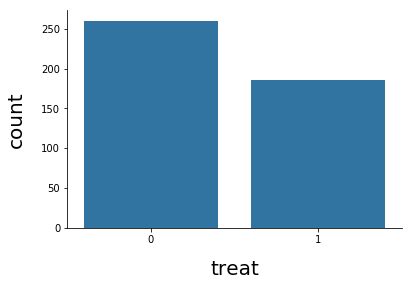

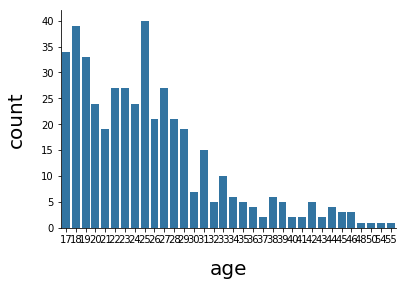

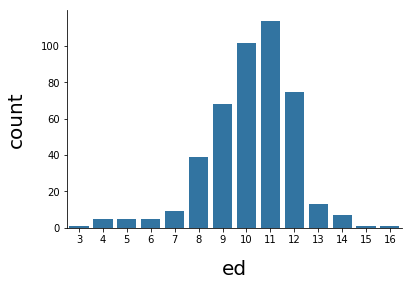

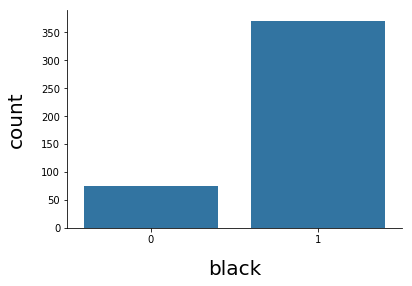

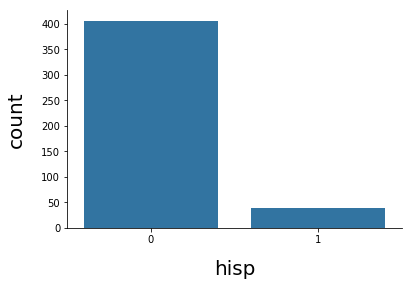

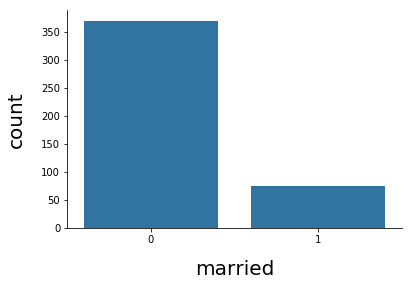

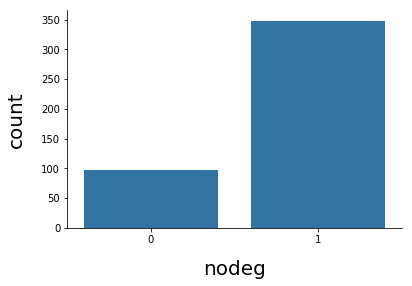

In [53]:
columns = ['treat', 'age', 'ed', 'black', 'hisp', 'married', 'nodeg']
for column in columns:
    sns.countplot(df[column], color="#1f77b4")
    plt.show()

How about the continous earnings variable?

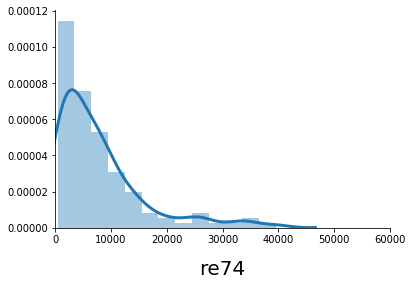

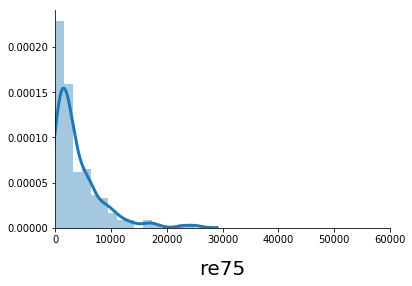

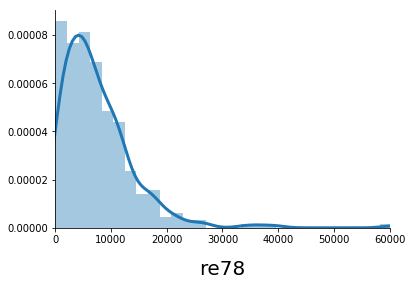

In [55]:
columns = ['re74', 're75', 're78']
for column in columns:
    nonzero_entries = df[column].where(df[column] > 0).dropna()
    ax = sns.distplot(nonzero_entries)
    ax.set_xlim(0, 60000)
    plt.show()

What is the data that corresponds to $(Y, Y_1, Y_0, D)$?

In [39]:
# We first create True / False
is_treated = df['treat'] == 1

df['Y'] = df['re78']
df['Y_0'] = df.loc[~is_treated, 're78']
df['Y_1'] = df.loc[is_treated, 're78']

df['D'] = np.nan
df.loc[~is_treated, 'D'] = 0
df.loc[is_treated, 'D'] = 1

Let us get a basic impression on how the distribution of earnings looks like by treatment status.

In [40]:
df.groupby('D')['re78'].describe()

,count,mean,std,min,25%,50%,75%,max
D,,,,,,,,
0.0,260.0,4554.800781,5483.835938,0.0,0.000000,3138.795532,7288.420044,39483.531250
1.0,185.0,6349.144043,7867.402344,0.0,485.229797,4232.309082,9642.999023,60307.929688


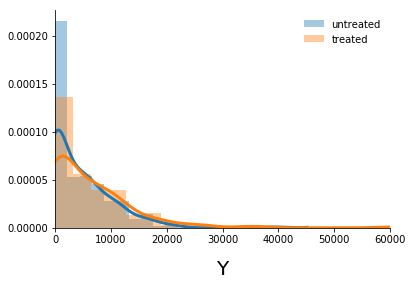

In [50]:
ax = sns.distplot(df['Y'][~is_treated], label='untreated')
ax = sns.distplot(df['Y'][is_treated], label='treated')
ax.set_xlim(0, 60000)
ax.legend();